# Table des matières
* [1. Travail demandé](#section_1)
    * [1.1 Importation des librairies ](#section_1_1)
    * [1.2 Premier aperçu des données ](#Section_1_2)
    * [1.3 Missions ](#Section_1_3)
        * [1.3.1 Étape 1](#section_1_3_1)
        * [1.3.2 Étape 2](#section_1_3_2)
* [2. Bonus](#section_2)
    * [2.1 Regression](#section_2_1)
    * [2.2 Classification](#section_2_2)

# 1. Travail demandé <a class="anchor" id="section_1"></a>

## 1.1 Importation des librairies <a class="anchor" id="section_1_1"></a>

- pyplot : dessiner les graphiques 
- numpy : pour la manipulation et le calcul matriciel 
- pandas : pour la gestion de DataFrame

In [1]:
from matplotlib import pyplot as plt 
import numpy as np
import pandas as pd 

## 1.2 Premier aperçu des données <a class="anchor" id="section_1_2"></a>

- cities.csv

In [2]:
cities = pd.read_csv("cities.csv", encoding='utf-8')
cities.head(10)

,id,local_name,unique_name,latitude,longitude,population
0,5159,"Padua, Veneto, Italia",padua,45.406435,11.876761,209678.0
1,76,"Barcelona, Cataluña, España",barcelona,41.385064,2.173404,1611822.0
2,81,"Basel, Basel-Stadt, Schweiz",basel,47.593437,7.619812,NaN
3,259,"Erlangen, Bayern, Deutschland",erlangen,49.589674,11.011961,105412.0
4,11979,"Balș, Olt, România",balș,44.353354,24.095672,NaN
5,10314,"Град Пожаревац, Централна Србија, Србија",град-пожаревац,44.619095,21.176522,NaN
6,11155,"Bussy-Lettrée, Grand-Est, France",bussy-lettree,48.804600,4.259500,NaN
7,11788,"Chamonix, Valle d'Aosta, Italia",chamonix-italia,45.817156,6.952375,NaN
8,11984,"Borger, Texas, United States of America",borger,35.667820,-101.397388,NaN
9,11825,"okres Zvolen, Banskobystrický kraj, Slovensko",okres-zvolen,48.576181,19.137116,NaN


In [3]:
cities_num = len(cities)
print(f"Le nombre de villes desservies est de {cities_num}")

Le nombre de villes desservies est de 8040


- stations.csv

In [4]:
stations = pd.read_csv("stations.csv", encoding='utf-8')
stations.head(10)

,id,unique_name,latitude,longitude
0,1,Aalen (Stuttgarter Straße),48.835296,10.092956
1,2,Aéroport Bordeaux-Mérignac,44.830226,-0.700883
2,3,Aéroport CDG,49.009900,2.559310
3,4,Aéroport de Berlin-Schönefeld,52.389446,13.520345
4,5,Aéroport de Dresden,51.123604,13.764737
5,6,Aéroport de Genève,46.230121,6.109288
6,7,Aéroport de Paris Beauvais-Tillé,49.462541,2.116935
7,8,Aéroport de Prague (bus station),50.107533,14.269309
8,9,Aéroport de Tegel,52.553760,13.292310
9,10,Aéroport Marco Polo,45.505432,12.338465


In [5]:
stations_num = len(stations)
print(f"Le nombre de villes desservies est de {stations_num}")

Le nombre de villes desservies est de 11035


- providers.csv

In [6]:
providers = pd.read_csv("providers.csv", encoding='utf-8')
providers.head(10)

,id,company_id,provider_id,name,fullname,has_wifi,has_plug,has_adjustable_seats,has_bicycle,transport_type
0,9,1,NaN,ouibus,Ouibus,True,True,True,False,bus
1,10,2,NaN,deinbus,Deinbus.de,False,False,False,False,bus
2,11,3,NaN,infobus,Infobus,False,False,False,False,bus
3,12,4,NaN,studentAgency,Student Agency,False,False,False,False,bus
4,13,5,NaN,flixbus,Flixbus,True,False,False,False,bus
5,14,6,NaN,driivme,DriiveMe,False,False,False,False,car
6,15,8,NaN,alsa,Alsa,False,False,False,False,bus
7,16,9,NaN,distribusion,Distribusion,False,False,False,False,bus
8,17,9,31,expressbusMunchen,Expressbus Munchen,False,False,False,False,bus
9,18,9,33,berlinLinienBus,Berlin Linien Bus,False,False,False,False,bus


In [7]:
providers_num = len(providers)
print(f"Le nombre de 'sous compagnies' est de {providers_num}")

Le nombre de 'sous compagnies' est de 227


- ticket_data.csv

In [8]:
ticket_data = pd.read_csv("ticket_data.csv", encoding='utf-8')
ticket_data.head(10)

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542
5,6795030,8385,NaN,NaN,2017-10-06 05:30:00+00,2017-10-06 08:30:00+00,1800,2017-10-01 01:03:18.948+00,NaN,NaN,628,453
6,6795031,8385,NaN,NaN,2017-10-06 07:00:42+00,2017-10-06 09:30:42+00,2150,2017-10-01 01:03:18.948+00,NaN,NaN,628,453
7,6795032,8385,NaN,NaN,2017-10-06 07:10:00+00,2017-10-06 09:40:00+00,1700,2017-10-01 01:03:18.948+00,NaN,NaN,628,453
8,6795033,8385,NaN,NaN,2017-10-06 10:00:00+00,2017-10-06 12:50:00+00,1700,2017-10-01 01:03:18.948+00,NaN,NaN,628,453
9,6795034,8385,NaN,NaN,2017-10-06 10:00:00+00,2017-10-06 12:50:00+00,1900,2017-10-01 01:03:18.948+00,NaN,NaN,628,453


## 1.3 Mission : <a class="anchor" id="section_1_3"></a>

- Étape 1 : extraire les infos intéressantes type prix min, moyen et max, durée min/max/moyenne par trajet
- Étape 2 :différence de prix moyen et durée selon le train, le bus et le covoit selon la distance du trajet (0-200km, 201-800km, 800-2000km, 2000+km) 


### 1.3.1 Étape 1 <a class="anchor" id="section_1_3_1"></a>

In [9]:
ticket_data.describe()

,id,company,o_station,d_station,price_in_cents,o_city,d_city
count,7.416800e+04,74168.000000,32727.000000,32727.000000,74168.000000,74168.000000,74168.000000
mean,6.832108e+06,7109.565527,2907.132673,2347.858129,4382.711061,849.186105,883.776265
std,2.141060e+04,3005.380792,3347.629180,3090.798007,3739.325367,1485.791782,1654.698575
min,6.795025e+06,9.000000,3.000000,3.000000,300.000000,5.000000,1.000000
25%,6.813567e+06,8376.000000,400.000000,396.000000,1900.000000,485.000000,453.000000
50%,6.832108e+06,8385.000000,701.000000,575.000000,3350.000000,628.000000,562.000000
75%,6.850650e+06,8385.000000,6246.000000,4538.000000,5250.000000,628.000000,628.000000
max,6.869192e+06,8387.000000,11017.000000,11017.000000,38550.000000,12190.000000,12190.000000


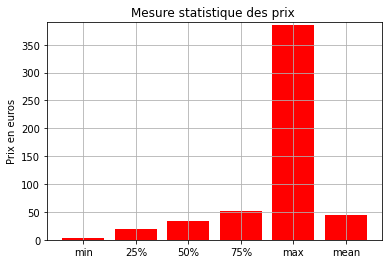

In [10]:
fig = plt.figure()

names = ["min", "25%", "50%", "75%", "max", "mean"]
y = [3, 19, 33.5, 52.5, 385.5, 43.83] 

plt.bar(names, y, color="red")
plt.ylim(0,390)
plt.grid()

plt.ylabel("Prix en euros")
plt.title("Mesure statistique des prix ")
plt.show()

In [11]:
def euros(prix):
    """
    fonction qui va convertir le prix en euros
    """
    return round(prix/100, 2)

In [12]:
prix_min = ticket_data["price_in_cents"].min()
prix_max = ticket_data["price_in_cents"].max()
prix_mean = ticket_data["price_in_cents"].mean()

print(f"Le prix minimum est de {euros(prix_min)}€, le prix maximum est de {euros(prix_max)}€ contre en moyenne un prix de {euros(prix_mean)}€")

Le prix minimum est de 3.0€, le prix maximum est de 385.5€ contre en moyenne un prix de 43.83€


Maintenant qu'on a le prix il faut déterminer la durée d'un trajet. Pour réussir cela il va falloir convertir les variables departure_ts et arrival_ts, qui sont des String, en heure afin de faire la soustraction pour obtenir la durée du voyage. 

Mais avant cela, vérifions que les données ne contiennent pas de valeurs manquantes. 

In [13]:
ticket_data.isnull().any()

id                 False
company            False
o_station           True
d_station           True
departure_ts       False
arrival_ts         False
price_in_cents     False
search_ts          False
middle_stations     True
other_companies     True
o_city             False
d_city             False
dtype: bool

La proportion de NaN étant nulle departure_ts et arrival_ts on peut passer à la suite. À retenir pour la suite : 4 variables ont des valeurs nulles. 

In [14]:
import datetime

In [15]:
### Ajout de la durée dans la dataframe contenant les tickets 
L = []
for i in range(len(ticket_data)): 
    depart = datetime.datetime.strptime(ticket_data["departure_ts"][i],"%Y-%m-%d %H:%M:%S+00")
    arrival = datetime.datetime.strptime(ticket_data["arrival_ts"][i],"%Y-%m-%d %H:%M:%S+00")
    #soustraction pour obtenir la durée
    duree = arrival - depart
    #conversien en minutes
    duree = round((duree.total_seconds())/60)
    L.append(duree)

In [16]:
#Afin de ne pas modifier les données originales on va affecter à une nouvelle variable la variable ticket_data
data = ticket_data

In [17]:
data["duree"] = L
data.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duree
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,370
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,1070
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,1917
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,1295
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,1306


In [18]:
data.describe()

,id,company,o_station,d_station,price_in_cents,o_city,d_city,duree
count,7.416800e+04,74168.000000,32727.000000,32727.000000,74168.000000,74168.000000,74168.000000,74168.000000
mean,6.832108e+06,7109.565527,2907.132673,2347.858129,4382.711061,849.186105,883.776265,424.620793
std,2.141060e+04,3005.380792,3347.629180,3090.798007,3739.325367,1485.791782,1654.698575,594.981356
min,6.795025e+06,9.000000,3.000000,3.000000,300.000000,5.000000,1.000000,20.000000
25%,6.813567e+06,8376.000000,400.000000,396.000000,1900.000000,485.000000,453.000000,180.000000
50%,6.832108e+06,8385.000000,701.000000,575.000000,3350.000000,628.000000,562.000000,290.000000
75%,6.850650e+06,8385.000000,6246.000000,4538.000000,5250.000000,628.000000,628.000000,480.000000
max,6.869192e+06,8387.000000,11017.000000,11017.000000,38550.000000,12190.000000,12190.000000,29571.000000


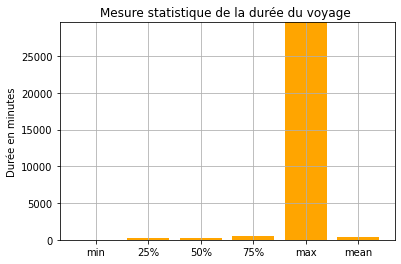

In [19]:
fig = plt.figure()

names = ["min", "25%", "50%", "75%", "max", "mean"]
y = [20, 180, 290, 480, 29571, 424.620793] 

plt.bar(names, y, color="orange")
plt.ylim(0,29571)
plt.grid()

plt.ylabel("Durée en minutes")
plt.title("Mesure statistique de la durée du voyage ")
plt.show()

On peut observer que la valeur max est vraiment très élgoinées des autres valeurs. Pour confimer cela, on va regarder les 5 plus grandes valeurs de notre dataset afin de savoir si cela est justifié ou si c'est une valeur hors du lot. 

In [20]:
print(data["duree"].sort_values(ascending=False)[0:15])

5175     29571
5176     29201
51070    21600
47858    21600
47856    21600
47854    21600
51053    21600
51254    21600
51069    21600
51271    21600
47862    21600
51072    21600
49232    21600
51071    21600
55250    21180
Name: duree, dtype: int64


On peut voir qu'il n'y a pas qu'un seul voyage dépassant les 20000 minutes donc il n'y a rien d'anormal.

### 1.3.2 Étape 2 <a class="anchor" id="section_1_3_2"></a>

- calcul des distances

In [21]:
print(np.isnan(ticket_data["o_station"]).sum()/ticket_data["o_station"].size)
print(np.isnan(ticket_data["d_station"]).sum()/ticket_data["o_station"].size)
print(np.isnan(ticket_data["o_city"]).sum()/ticket_data["o_station"].size)
print(np.isnan(ticket_data["d_city"]).sum()/ticket_data["o_station"].size)

0.5587450113256391
0.5587450113256391
0.0
0.0


Comme on peut le voir, 56% des données concernant les stations desservies ne sont pas communiquées contrairement aux villes. Pour les calculs des distances on va donc se baser sur les villes afin de ne pas perdre 56% de l'information même si savoir quelles stations étaient desservies étaient plus précis.


Je teste deux formules qui calculent la distance en fonction des coordonnées en degrés décimaux afin de choisir la meilleure. Pour ce faire, je me base sur la distance Paris-Barcelone en vol d'oiseau qui est d'environ 831km.

- Formule de Haversine

In [22]:
def distance(lat1, lon1, lat2, lon2):
    p = 0.017453292519943295 # Pi/180
    a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p)) / 2
    return round(0.6213712 * 12742 * np.arcsin(np.sqrt(a)))

In [23]:
print(distance(48.847702,2.352311,41.385064,2.173404))

516.0


- relation fondamentale de trigonométrie
sphérique

In [24]:
import math

In [25]:
def deg2rad(deg_dec):
    """
    Convertit un angle "degrés décimaux" en "radians"
    """
    return deg_dec/180*np.pi

In [26]:
def distanceGPS(lat1, long1, lat2, long2):
    """
    Retourne la distance en mètres entre les 2 points A et B connus grâce à
    leurs coordonnées GPS (en radians).
    """
    # Rayon de la terre en mètres =
    RT = 6378137
    # conversion en radian
    latA, longA, latB, longB = deg2rad(lat1), deg2rad(long1), deg2rad(lat2), deg2rad(long2)
    # angle en radians entre les 2 points
    S = math.acos(math.sin(latA)*math.sin(latB) + math.cos(latA)*math.cos(latB)*math.cos(abs(longB-longA)))
    # distance entre les 2 points, comptée sur un arc de grand cercle
    return round(S*RT/1000)

In [27]:
print(distanceGPS(48.847702,2.352311,41.385064,2.173404))

831


La formule qui se rapproche le plus est la deuxième formule, on va donc l'utiliser

In [28]:
def distance_ville(ida, idb): 
    """
    calcul la distance entre la ville avec un ID A et un ID B
    """
    lata, lona = cities["latitude"][cities["id"]==ida], cities["longitude"][cities["id"]==ida] 
    latb, lonb = cities["latitude"][cities["id"]==idb], cities["longitude"][cities["id"]==ida]
    return distanceGPS(lata,lona,latb,lonb)

In [29]:
L = []
dist = 0
for i in range(len(ticket_data)): 
    ida, idb = ticket_data["o_city"][i], ticket_data["d_city"][i]
    dist = distance_ville(ida, idb)
    L.append(dist)

In [30]:
data["distance_o_d"] = L
data.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duree,distance_o_d
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,370,479
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,1070,479
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,1917,479
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,1295,479
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,1306,479


Pour la deuxième étape de la mission, il faut aussi identifier le type de transport et comme vu précédemment, la proportion de NaN étant nulle pour company on peut continuer sans soucis.

Pour obtenir le type de transport, rien de bien compliqué, il suffit d'appliquer le bon masque au dataframe pour avoir ce que l'on souhaite. Il faut faire attention tout de même de ne pas oublier la fonction iloc pour accéder à l'élément du dataframe.

In [31]:
### Ajout des types de transports dans la dataframe contenant les tickets
L = []
for i in range(len(ticket_data)): 
    type_transport = providers[providers["id"] == ticket_data["company"][i]]["transport_type"].iloc[0]
    L.append(type_transport)

In [32]:
data["transport_type"] = L

On peut maintenant essayer d'extraire les informations demandées dans l'étape 2. 

In [33]:
#suppression de features inutiles pour le moment
df = data.drop(["id","company", "o_station", "d_station", "departure_ts", "arrival_ts", "search_ts", "middle_stations", "other_companies", "o_city", "d_city"], axis=1)

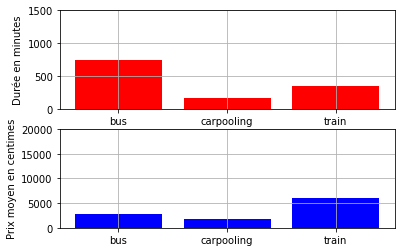

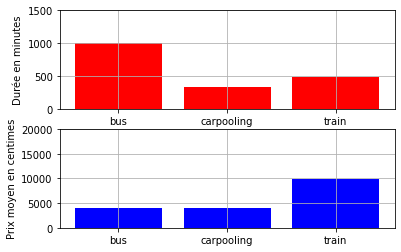

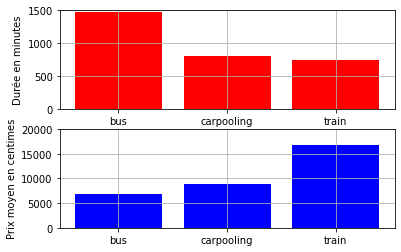

In [34]:
df_200 = df[df["distance_o_d"] < 200].groupby(["transport_type"]).mean()

fig200 = plt.figure()
names = df_200.index
y1 = df_200["duree"]
y2 = df_200["price_in_cents"]
plt.subplot(211)
plt.bar(names, y1, color="red")
plt.ylabel("Durée en minutes")
plt.ylim(0,1500)
plt.grid()
plt.subplot(212)
plt.bar(names, y2, color="blue")
plt.ylabel("Prix moyen en centimes")
plt.ylim(0,20000)
plt.grid()


df_200_800 = df[(df["distance_o_d"]< 800) & (df["distance_o_d"]>200)].groupby(["transport_type"]).mean()
fig200_800 = plt.figure()
names = df_200_800.index
y1 = df_200_800["duree"]
y2 = df_200_800["price_in_cents"]
plt.subplot(211)
plt.bar(names, y1, color="red")
plt.ylabel("Durée en minutes")
plt.ylim(0,1500)
plt.grid()
plt.subplot(212)
plt.bar(names, y2, color="blue")
plt.ylabel("Prix moyen en centimes")
plt.ylim(0,20000)
plt.grid()


df_800_2000 = df[(df["distance_o_d"]>800) & (df["distance_o_d"]<2000)].groupby(["transport_type"]).mean()
fig800_2000 = plt.figure()
names = df_800_2000.index
y1 = df_800_2000["duree"]
y2 = df_800_2000["price_in_cents"]
plt.subplot(211)
plt.bar(names, y1, color="red")
plt.ylabel("Durée en minutes")
plt.ylim(0,1500)
plt.grid()
plt.subplot(212)
plt.bar(names, y2, color="blue")
plt.ylabel("Prix moyen en centimes")
plt.ylim(0,20000)
plt.grid()

plt.show()

In [35]:
distance_max = df["distance_o_d"].max()

print(f"La distance max étant de {distance_max}km, il n'est pas nécessaire d'observer les distances à plus de 2000km puisqu'il n'y en a pas ")

La distance max étant de 1492km, il n'est pas nécessaire d'observer les distances à plus de 2000km puisqu'il n'y en a pas 


Il est assez flagrant et normal de voir que le trajet en bus prend plus de temps que le covoiturage ou le train. Quant au train, il est toujours plus cher que les deux autres moyens de transport. On aurait pu justifier cela par sa rapidité mais cela n'est vrai que pour les distances supérieures à 800km. Sinon le covoiturage semble le plus rapide. On peut donc conclure que le covoiturage est la meilleure solution en général si l'on souhaite voyagé. Outre sa durée (supérieure à celui du train) et son prix (supérieure à celui du bus) pour les trajet de plus de 800km, il est le meilleur dans toutes les catégories pour les autres trajets.

## 2. Bonus <a class="anchor" id="section_2"></a>

Ce qu'on pourrait faire avec ses données ce serait de prédire le prix d'un ticket selon les critères que l'on dispose dans le DataFrame data

### 2.1 Regression <a class="anchor" id="section_2_1"></a>

- Nettoyage des données 

In [36]:
data.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duree,distance_o_d,transport_type
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,4550,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,370,479,carpooling
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,1450,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,1070,479,bus
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,7400,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,1917,479,train
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,13500,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,1295,479,train
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,7710,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,1306,479,train


<AxesSubplot:>

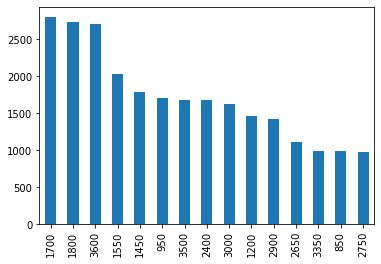

In [37]:
price_freq = data['price_in_cents'].value_counts()
price_freq.iloc[0:15].plot.bar()

On peut observer que les prix les plus fréquents sont 17€, 18€ et 36€. Pour faciliter le travail, on va retirer tout les centimes pour n'avoir que des valeurs en euros.

In [38]:
data['price_in_cents']/=100
data['price_in_cents'] = data['price_in_cents'].astype(int)
data.head()

,id,company,o_station,d_station,departure_ts,arrival_ts,price_in_cents,search_ts,middle_stations,other_companies,o_city,d_city,duree,distance_o_d,transport_type
0,6795025,8385,NaN,NaN,2017-10-13 14:00:00+00,2017-10-13 20:10:00+00,45,2017-10-01 00:13:31.327+00,NaN,NaN,611,542,370,479,carpooling
1,6795026,9,63.0,1044.0,2017-10-13 13:05:00+00,2017-10-14 06:55:00+00,14,2017-10-01 00:13:35.773+00,"{149,418}",{13},611,542,1070,479,bus
2,6795027,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 21:24:00+00,74,2017-10-01 00:13:40.212+00,"{798,798,6794,6246}","{8377,8376}",611,542,1917,479,train
3,6795028,8377,5905.0,6495.0,2017-10-13 13:27:00+00,2017-10-14 11:02:00+00,135,2017-10-01 00:13:40.213+00,"{798,798,6794,6246}","{8377,8376}",611,542,1295,479,train
4,6795029,8381,5905.0,6495.0,2017-10-13 21:46:00+00,2017-10-14 19:32:00+00,77,2017-10-01 00:13:40.213+00,"{5983,5983}",{8380},611,542,1306,479,train


Comme vu précédemment, o_station et d_station possèdent trop de NaN on va donc les retirer. Ensuite je ne sais pas à quoi correspond search_ts je vais donc lui aussi le retirer. Les variables derparture_ts et arrival_ts ont trouvé leurs utilités dans la nouvelle variable duree, on peut donc aussi les supprimer. Middle_stations et other_companies sont des variables intéressantes et méritent notre attention car il est sûr qu'ils jouent un rôle important sur le prix final. Ensuite, il est évident que la destination est aussi une variable à prendre en compte et on va donc garder les variables o_city et d_city. Quant à la variable id, elle n'a pas vraiment d'utilité. 

Concernant les variables Middle_stations et other_companies on va plutôt les traduire en nombre de correspondances effectuées et en nombre d'échange effectués à travers les différentes compagnies utilisées.

In [39]:
data2 = data.drop(["id", "o_station", "d_station", "departure_ts", "arrival_ts", "search_ts"], axis=1)

In [40]:
data2 = data2.fillna(0)

In [41]:
### comptons le nombre de middle stations 
L = []
for i in range(len(data2)): 
    if(data2["middle_stations"].iloc[i]!=0):
        #récupérons la string 
        s = data2["middle_stations"].iloc[i]
        #récupérons le nomre de middle stations 
        #nombre de virgules + 1
        L.append(s.count(",")+1)
    else:
        L.append(0)

##De la même manière, récupérons le nombre de compagnies utilisé
l = []
for i in range(len(data2)): 
    if(data2["other_companies"].iloc[i]!=0):
        #récupérons la string 
        s = data2["other_companies"].iloc[i]
        #récupérons le nomre de middle stations 
        #nombre de virgules + 1
        l.append(s.count(",")+1)
    else:
        l.append(0)

On peut maintenant ajouter ces variables à nos datasets et supprimer les anciennes. 

In [42]:
data2 = data2.drop(["other_companies", "middle_stations"], axis=1)
data2["middle_stations"] = L
data2["other_companies"] = l

data2.head()

,company,price_in_cents,o_city,d_city,duree,distance_o_d,transport_type,middle_stations,other_companies
0,8385,45,611,542,370,479,carpooling,0,0
1,9,14,611,542,1070,479,bus,2,1
2,8377,74,611,542,1917,479,train,4,2
3,8377,135,611,542,1295,479,train,4,2
4,8381,77,611,542,1306,479,train,2,1


Maintenant que les features ont été choisies, il faut encoder les variables qui doivent l'être et normalisés les autres. Puisqu'il n'y pas de variables aberrantes on peut se baser sur la méthode du MinMax pour normaliser. 

In [43]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler

In [44]:
#encodage
encoder = LabelBinarizer()
y_transport = LabelBinarizer().fit_transform(data2["transport_type"])

In [45]:
data3 = data2.assign(bus = y_transport[:,0], 
               carpooling = y_transport[:,1],
               train = y_transport[:,2])

data3 = data3.drop("transport_type", axis=1)
data3.head()

,company,price_in_cents,o_city,d_city,duree,distance_o_d,middle_stations,other_companies,bus,carpooling,train
0,8385,45,611,542,370,479,0,0,0,1,0
1,9,14,611,542,1070,479,2,1,1,0,0
2,8377,74,611,542,1917,479,4,2,0,0,1
3,8377,135,611,542,1295,479,4,2,0,0,1
4,8381,77,611,542,1306,479,2,1,0,0,1


In [46]:
#split des données
from sklearn.model_selection import train_test_split

train, test = train_test_split(data3, test_size=0.3)

In [47]:
#Normalisation des données
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
train_scaled

array([[9.99761280e-01, 8.90052356e-02, 7.14813295e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.99761280e-01, 3.66492147e-02, 7.18096020e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [9.99761280e-01, 1.28272251e-01, 6.89372179e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       ...,
       [9.99761280e-01, 6.02094241e-02, 5.11284366e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00],
       [4.77440917e-04, 5.49738220e-02, 4.38243742e-02, ...,
        1.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.99761280e-01, 7.06806283e-02, 5.11284366e-02, ...,
        0.00000000e+00, 1.00000000e+00, 0.00000000e+00]])

In [48]:
Y_train = train_scaled[:,1]
X_train = np.delete(train_scaled, (1), axis=1)

print(Y_train.shape, X_train.shape)

(51917,) (51917, 10)


In [49]:
#entrainement du modèle
from sklearn.linear_model import LinearRegression

In [50]:
linear_regression = LinearRegression()
linear_regression.fit(X_train, Y_train)

LinearRegression()

L'évaluation du modèle passe par deux métriques : 
- L’erreur quadratique moyenne RMSE (l’erreur d’estimation)
- le R2 (la qualité du modèle de régression)

In [51]:
#avant de prédire, évaluons l'entrainement 
# Evaluation du training set
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

Y_train_predict = linear_regression.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, Y_train_predict)))
r2 = r2_score(Y_train, Y_train_predict)
 
print(f"Lerreur quadratique moyenne est {rmse} \n")
print(f"le score R2 est {r2}")

Lerreur quadratique moyenne est 0.06262422828001389 

le score R2 est 0.5844584193866471


Maitenant, lançons nous dans la prédiction de prix. 

In [52]:
test_scaled = scaler.transform(test)
Y_test = test_scaled[:,1]
X_test = np.delete(test_scaled, (1), axis=1)
Y_test_predict = linear_regression.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))
r2 = r2_score(Y_test, Y_test_predict)
 
print(f"Lerreur quadratique moyenne est {rmse} \n")
print(f"le score R2 est {r2}")

Lerreur quadratique moyenne est 0.06528976840616824 

le score R2 est 0.5689807388534454


On pourrait aussi à partir de ses données afin d'effectuer une classification comme par exemple déterminer quel a été le type de transport utilisé.

### 2.2 Classification <a class="anchor" id="section_2_2"></a>

Nous allons nous resservir de la dataframe suivante : 

In [53]:
data2.head()

,company,price_in_cents,o_city,d_city,duree,distance_o_d,transport_type,middle_stations,other_companies
0,8385,45,611,542,370,479,carpooling,0,0
1,9,14,611,542,1070,479,bus,2,1
2,8377,74,611,542,1917,479,train,4,2
3,8377,135,611,542,1295,479,train,4,2
4,8381,77,611,542,1306,479,train,2,1


Cette fois-ci, on ne va pas encoder de la manière précédente mais plutôt associé un nombre à un type de transport : 
- 0 : bus 
- 1 : covoiturage
- 2 : train

In [54]:
data4 = data2 
data4["transport_type"].replace(["bus", "carpooling", "train"], [0,1,2], inplace = True)
data4.head()

,company,price_in_cents,o_city,d_city,duree,distance_o_d,transport_type,middle_stations,other_companies
0,8385,45,611,542,370,479,1,0,0
1,9,14,611,542,1070,479,0,2,1
2,8377,74,611,542,1917,479,2,4,2
3,8377,135,611,542,1295,479,2,4,2
4,8381,77,611,542,1306,479,2,2,1


In [89]:
from sklearn.neighbors import KNeighborsClassifier

In [90]:
#Normalisation des données
train, test = train_test_split(data4, test_size=0.3)
Y_train = train["transport_type"]
X_train = train.drop("transport_type", axis=1)
Y_test = test["transport_type"]
X_test = test.drop("transport_type", axis=1)

In [91]:
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
print(knn.score(X_train, Y_train), "\n",knn.score(X_test, Y_test))

0.974651848142227 
 0.9619342950878612


Testons maintenant sur des données normalisées. 

In [92]:
scaler = MinMaxScaler()
train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

In [93]:
Y_train = train_scaled[:,6].astype(int)
X_train = np.delete(train_scaled, (6), axis=1)
Y_test = test_scaled[:,6].astype(int)
X_test = np.delete(test_scaled, (6), axis=1)

In [94]:
KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
print(KNN.score(X_train, Y_train), "\n", KNN.score(X_test, Y_test))

0.9938555771712542 
 0.9907869309244528


Les données normalisées donnent de meilleurs résultats. 

On pourrait chercher à optimiser ce nombre en cherchant le nombre de voisins qui nous donnerait une erreur plus faible.

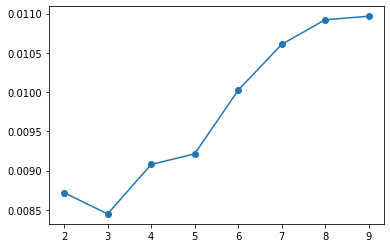

In [95]:
erreur = []
for k in range(2,10):
    knn = KNeighborsClassifier(k)
    erreur.append(1-(knn.fit(X_train, Y_train).score(X_test, Y_test)))
plt.plot(range(2,10), erreur, 'o-')
plt.show()